# 注意：
本Notebookはアニメーションを用いている。このため，JupyterLabでエラーが生じた場合（IPythonとのインタフェースが不備のもよう，2020年9月時点），いったん，JupyterLabを終了して，Jupyter Notebookを立ち上げてから，再実行してください。

# ランダムウォークのアニメーション

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

%matplotlib nbagg
%matplotlib inline

## ランダムウォーク，1次元
1歩あたりの平均は$2p-1$,  n歩では$n(2p-1)$である

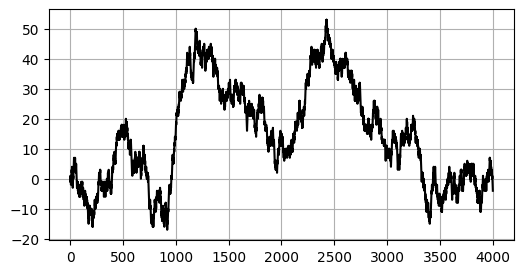

In [ ]:
np.random.seed(123)

num = 4000
p = 0.5
s = np.zeros(num+1)

for k in range(1, num+1):
    x = 1
    if np.random.rand() > p:
        x = -1
    s[k] = s[k-1] + x

fig = plt.figure(figsize=(6,3))
plt.plot(s, c='k')
plt.grid()
#plt.ylim(-250,1000)

#plt.savefig('fig_SM_RandomWalk_1D.png', bbox_inches='tight')

### アニメーション表現
FuncAnimationの使用<br>
Doc:https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.animation.FuncAnimation.html<br>

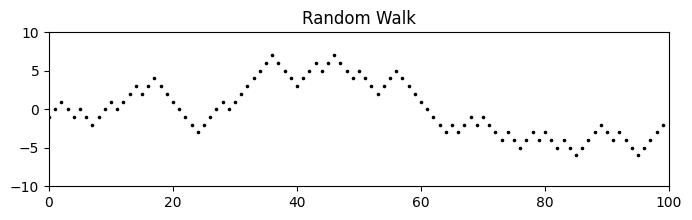

In [ ]:
np.random.seed(123)
fig, ax = plt.subplots(figsize=(8, 2))
v = 0
num_steps = 100
x_values = []
y_values = []

for k in range(num_steps):
    h = 1
    if np.random.rand() > 0.5:
        h = -1
    v += h
    x_values.append(k)
    y_values.append(v)

ax.scatter(x_values, y_values, c='k', s=10, marker='.')
ax.set_ylim(-10, 10)
ax.set_xlim(0, num_steps)
ax.set_title('Random Walk')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


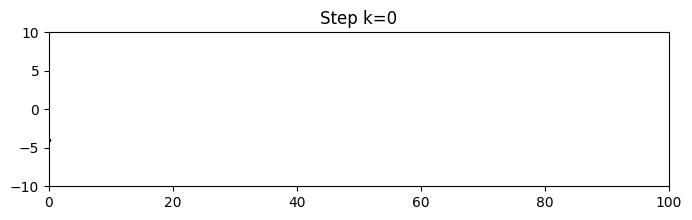

In [ ]:
np.random.seed(123)
fig, ax = plt.subplots(figsize=(8, 2))
v = 0

def update(k):
    global v
    h = 1
    if np.random.rand() > 0.5:
        h = -1
    v += h
    ax.clear()
    ax.scatter(k, v, c='k', s=10, marker='.')
    ax.set_ylim(-10, 10)
    ax.set_xlim(0, 100)
    ax.set_title('Step k=' + str(k))

ani = FuncAnimation(fig, update, frames=range(100), repeat=False)
HTML(ani.to_jshtml())

In [ ]:
#plt.savefig('fig_SM_RandomWalkAnima_1D.png', bbox_inches='tight')
#plt.close()

##おまけ
https://www.anarchive-beta.com/entry/2024/02/26/111100

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


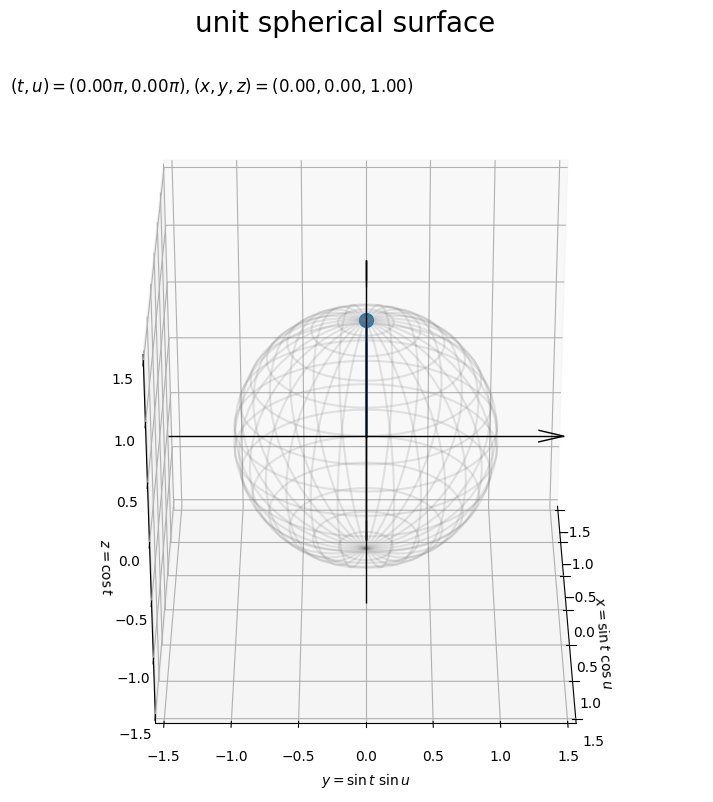

In [ ]:
# フレーム数を指定
frame_num = 101

# 点用のラジアンを作成
point_t_vec = np.linspace(start=0, stop=2*np.pi, num=frame_num+1)[:frame_num+1] # 1周期分
point_u_vec = np.linspace(start=0, stop=2*np.pi, num=frame_num+1)[:frame_num+1] # 1周期分
#print(point_t_vec[:5].round(2))
#print(point_u_vec[:5].round(2))

# 単位球面上の点の座標を計算
point_x_vec = np.sin(point_t_vec) * np.cos(point_u_vec)
point_y_vec = np.sin(point_t_vec) * np.sin(point_u_vec)
point_z_vec = np.cos(point_t_vec)
#print(point_x_vec[:5].round(2))
#print(point_y_vec[:5].round(2))
#print(point_z_vec[:5].round(2))

# 球面用のラジアンを作成
sphere_t_vec = np.linspace(start=0.0, stop=2.0*np.pi, num=61)
sphere_u_vec = np.linspace(start=0.0, stop=2.0*np.pi, num=61)
sphere_t_arr, sphere_u_arr = np.meshgrid(sphere_t_vec, sphere_u_vec) # 格子点を作成
#print(sphere_t_arr[:3, :5].round(2))
#print(sphere_u_arr[:3, :5].round(2))

# 球面の座標を計算
sphere_x_arr = np.sin(sphere_t_arr) * np.cos(sphere_u_arr)
sphere_y_arr = np.sin(sphere_t_arr) * np.sin(sphere_u_arr)
sphere_z_arr = np.cos(sphere_t_arr)
#print(sphere_x_arr[:3, :5].round(2))
#print(sphere_y_arr[:3, :5].round(2))
#print(sphere_z_arr[:3, :5].round(2))

# グラフサイズを設定
axis_size = 1.5

# グラフオブジェクトを初期化
fig, ax = plt.subplots(figsize=(9, 9), facecolor='white',
                       subplot_kw={'projection': '3d'})
fig.suptitle('unit spherical surface', fontsize=20)

# 矢サイズを指定
alr = 0.1

# 作図処理を定義
def update(i):

    # 前フレームのグラフを初期化
    plt.cla()

    # 点の座標を取得
    t = point_t_vec[i]
    u = point_u_vec[i]
    x = point_x_vec[i]
    y = point_y_vec[i]
    z = point_z_vec[i]

    # ラベル用の文字列を作成
    coord_label = '$(t, u) = ({:.2f}\pi, {:.2f}\pi), (x, y, z) = ({:.2f}, {:.2f}, {:.2f})$'.format(
        t/np.pi, u/np.pi, x, y, z
    )

    # 単位球面状の点を作図
    ax.quiver([-axis_size, 0, 0], [0, -axis_size, 0], [0, 0, -axis_size],
              [2*axis_size, 0, 0], [0, 2*axis_size, 0], [0, 0, 2*axis_size],
              arrow_length_ratio=alr/axis_size, color='black', linewidth=1) # 軸線
    ax.plot_wireframe(sphere_x_arr, sphere_y_arr, sphere_z_arr, color='gray', alpha=0.1) # 球面
    ax.plot([0, x], [0, y], [0, z], linewidth=2) # 動径
    ax.scatter(x, y, z, s=100) # 球面上の点
    ax.plot(point_x_vec[:i+1], point_y_vec[:i+1], point_z_vec[:i+1], linewidth=1) # 軌跡
    ax.set_xlim(xmin=-axis_size, xmax=axis_size)
    ax.set_ylim(ymin=-axis_size, ymax=axis_size)
    ax.set_zlim(zmin=-axis_size, zmax=axis_size)
    ax.set_xlabel('$x = \sin t\ \cos u$')
    ax.set_ylabel('$y = \sin t\ \sin u$')
    ax.set_zlabel('$z = \cos t$')
    ax.set_title(coord_label, loc='left')
    ax.set_box_aspect((1, 1, 1))
    ax.view_init(elev=30, azim=i) # 表示アングル

# 動画を作成
ani = FuncAnimation(fig=fig, func=update, frames=frame_num, interval=100)

# 動画を書出
ani.save(filename='UnitSphere.gif', dpi=100)

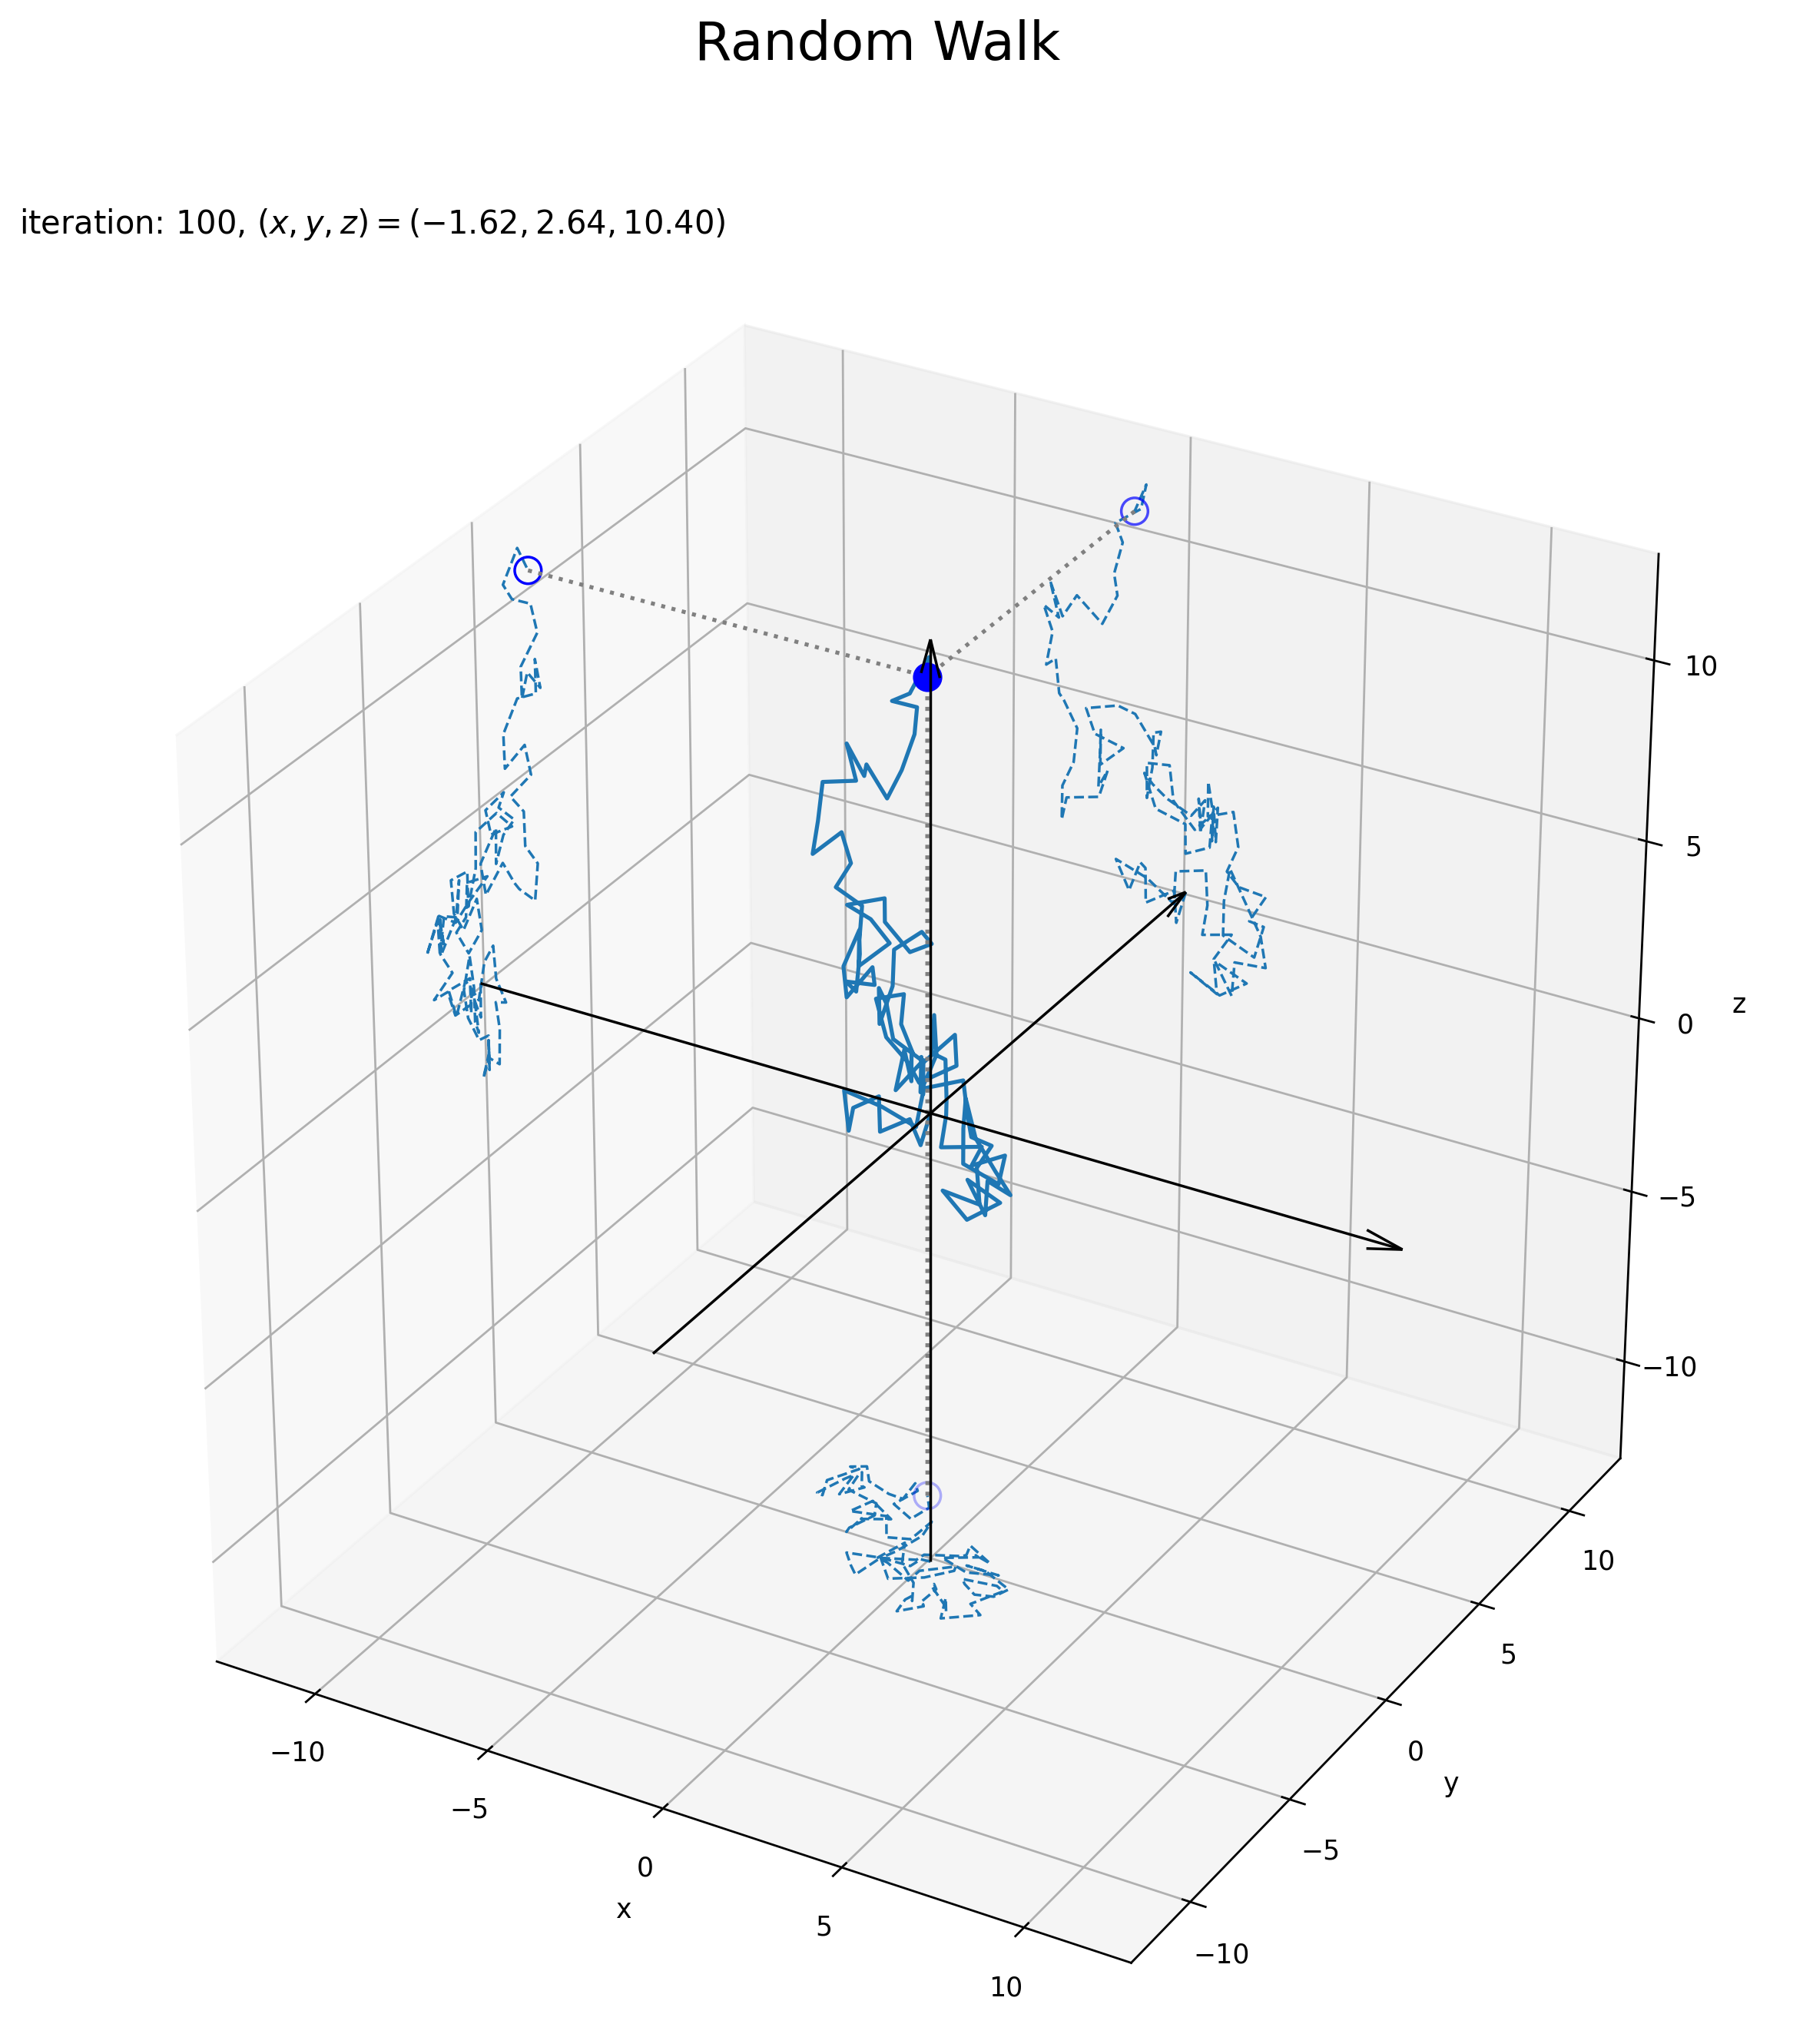

In [22]:
# 試行回数を指定
max_iter = 100

# 乱数を生成
random_t_vec = 2*np.pi * np.random.uniform(low=0, high=1, size=max_iter) # ラジアン
random_u_vec = 2*np.pi * np.random.uniform(low=0, high=1, size=max_iter) # ラジアン
#print(random_t_vec[:5].round(2))
#print(random_t_vec.shape)
#print(random_u_vec[:5].round(2))
#print(random_u_vec.shape)

# 試行ごとに集計
x_vec = np.cumsum(
    np.hstack([0, np.sin(random_t_vec)*np.cos(random_u_vec)]) # 初期値を追加
)
y_vec = np.cumsum(
    np.hstack([0, np.sin(random_t_vec)*np.sin(random_u_vec)]) # 初期値を追加
)
z_vec = np.cumsum(
    np.hstack([0, np.cos(random_t_vec)]) # 初期値を追加
)
#print(x_vec[:5].round(2))
#print(x_vec.shape)
#print(y_vec[:5].round(2))
#print(y_vec.shape)
#print(z_vec[:5].round(2))
#print(z_vec.shape)

# 最終値を取得
x = x_vec[max_iter]
y = y_vec[max_iter]
z = z_vec[max_iter]

# 余白サイズを指定
margin_rate = 0.1

# グラフサイズを設定
axis_size = np.max([np.abs(x_vec), np.abs(y_vec), np.abs(z_vec)])
axis_size  = np.ceil(axis_size * (1+margin_rate)) # 余白を追加

# 矢サイズを指定
alr = 0.5

# 3Dランダムウォークを作図
fig, ax = plt.subplots(figsize=(12, 12), dpi=250, facecolor='white',
                       subplot_kw={'projection': '3d'})
ax.quiver([-axis_size, 0, 0], [0, -axis_size, 0], [0, 0, -axis_size],
          [2*axis_size, 0, 0], [0, 2*axis_size, 0], [0, 0, 2*axis_size],
          arrow_length_ratio=alr/axis_size, color='black', linewidth=1) # x・y・z軸線
ax.plot(x_vec, y_vec, zs=-axis_size, zdir='z',
        color='C0', linewidth=1, linestyle='dashed') # xy面の軌跡
ax.plot(y_vec, z_vec, zs=-axis_size, zdir='x',
        color='C0', linewidth=1, linestyle='dashed') # yz面の軌跡
ax.plot(x_vec, z_vec, zs=axis_size, zdir='y',
        color='C0', linewidth=1, linestyle='dashed') # xz面の軌跡
ax.scatter([x, -axis_size, x],
           [y, y, axis_size],
           [-axis_size, z, z],
           s=100, fc='none', ec='blue') # 面ごとの最終地点
ax.quiver(x, y, z,
          [0, -axis_size-x, 0], [0, 0, axis_size-y], [-axis_size-z, 0, 0],
          arrow_length_ratio=0, color='gray', linestyle='dotted') # 点の目盛線
ax.plot(x_vec, y_vec, z_vec) # 軌跡
ax.scatter(x, y, z, s=100, color='blue') # 最終地点
ax.margins(x=0.0, y=0.0, z=0.0) # (機能しない?のでlimで謎小細工)
ax.set_xlim(xmin=-axis_size/1.05, xmax=axis_size/1.05)
ax.set_ylim(ymin=-axis_size/1.05, ymax=axis_size/1.05)
ax.set_zlim(zmin=-axis_size/1.05, zmax=axis_size/1.05)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('iteration: {}, $(x, y, z) = ({:.2f}, {:.2f}, {:.2f})$'.format(max_iter, x, y, z), loc='left')
fig.suptitle('Random Walk', fontsize=20)
ax.set_box_aspect((1, 1, 1))
plt.show()

In [ ]:
# 余白サイズを指定
margin_rate = 0.1

# グラフサイズを設定
axis_size = np.max([np.abs(x_vec), np.abs(y_vec), np.abs(z_vec)])
axis_size  = np.ceil(axis_size * (1+margin_rate)) # 余白を追加

# グラフオブジェクトを初期化
fig, ax = plt.subplots(figsize=(12, 12), facecolor='white',
                       subplot_kw={'projection': '3d'})
fig.suptitle('Random Walk', fontsize=20)

# 矢サイズを指定
alr = 0.5

# 作図処理を定義
def update(i):

    # 前フレームのグラフを初期化
    plt.cla()

    # 現在値を取得
    x = x_vec[i]
    y = y_vec[i]
    z = z_vec[i]

    # 3Dランダムウォークを作図
    ax.quiver([-axis_size, 0, 0], [0, -axis_size, 0], [0, 0, -axis_size],
              [2*axis_size, 0, 0], [0, 2*axis_size, 0], [0, 0, 2*axis_size],
              arrow_length_ratio=alr/axis_size, color='black', linewidth=1) # x・y・z軸線
    ax.plot(x_vec[:i+1], y_vec[:i+1], zs=-axis_size, zdir='z',
            color='C0', linewidth=1, linestyle='dashed') # xy面の軌跡
    ax.plot(y_vec[:i+1], z_vec[:i+1], zs=-axis_size, zdir='x',
            color='C0', linewidth=1, linestyle='dashed') # yz面の軌跡
    ax.plot(x_vec[:i+1], z_vec[:i+1], zs=axis_size, zdir='y',
            color='C0', linewidth=1, linestyle='dashed') # xz面の軌跡
    ax.scatter([x, -axis_size, x],
               [y, y, axis_size],
               [-axis_size, z, z],
               s=100, fc='none', ec='blue') # 面ごとの現在地点
    ax.quiver(x, y, z,
              [0, -axis_size-x, 0], [0, 0, axis_size-y], [-axis_size-z, 0, 0],
              arrow_length_ratio=0, color='gray', linestyle='dotted') # 点の目盛線
    ax.plot(x_vec[:i+1], y_vec[:i+1], z_vec[:i+1]) # 軌跡
    ax.scatter(x, y, z, s=100, color='blue') # 現在地点
    ax.margins(x=0.0, y=0.0, z=0.0) # (機能しない?のでlimで謎小細工)
    ax.set_xlim(xmin=-axis_size/1.05, xmax=axis_size/1.05)
    ax.set_ylim(ymin=-axis_size/1.05, ymax=axis_size/1.05)
    ax.set_zlim(zmin=-axis_size/1.05, zmax=axis_size/1.05)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('iteration: {}, $(x, y, z) = ({:.2f}, {:.2f}, {:.2f})$'.format(i, x, y, z), loc='left')
    ax.set_box_aspect((1, 1, 1))

# 動画を作成
ani = FuncAnimation(fig=fig, func=update, frames=max_iter+1, interval=100)

# 動画を書出
ani.save('3d_360_xyz_1.gif', dpi=100)